# Introduction
<br>
The motivation in the project is to create a neural network that properly identifies sign language letters from pictures.<br>
**Reasearch Question:**<br>
Can a neural network identify differences between sign language letters given there fairly small differences.<br>
<br>
**Data Set:** <br>
Our data set is a subset of a larger data set that was made up of images showing the various sign language letters with a <br>human hand. In the original data there were 24,300 training images and 2,700 test.<br>
The build of the subset we created is:<br>
Train - 4,500<br>
Validation -1,350 <br>
Test - 2,700 <br>
<br>
The motivation behind this project is that on a yearly basis the percentage of people suffering from hearing grows. We believe <br>
that with this reasearch we can show that there is much potential in using deep learning methods for educational and entertainment <br>
purposes. The final product here is a starting point for a field that has not been developed. One of the ideas that came into <br>
thought are teaching platforms like dual lingo adding an option for sign language using this type of model can allow student to <br>
"sign" to a camera and get feedback if they are doing it properly. Another idea was that eventually by using these types of methods <br>
platforms like netflix can add sign language options to their platform just like subtitles.<br>
<br>
The Ideology for this project is to help bridge the gap between the hearing and the hearing impared and increase the ability <br>
to use sign language.

# Importing Libraries

In [1]:
import os
import numpy as np
from PIL import Image
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import torch
import torchvision
import os
import time
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import transforms
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor, Normalize, Compose, Resize, Grayscale
import warnings
warnings.simplefilter("ignore")

# EDA
In this part we will show the various things we checked about our data

In [2]:
import os
import torch
import numpy as np
from PIL import Image

# Define the paths to the input and output folders
input_folder = 'images/train'
output_folder = 'averages'

# Define the size of the images
image_size = (513, 512)

# Loop over all the folders in the input folder
for folder_name in os.listdir(input_folder):
    # Check if the folder is a letter folder (i.e., A-Z or Blank)
    if folder_name.isalpha() or folder_name == 'Blank':
        # Create a list to store the images
        images = []
        # Loop over all the images in the folder
        for filename in os.listdir(os.path.join(input_folder, folder_name)):
            # Load the image using Pillow
            image = Image.open(os.path.join(input_folder, folder_name, filename))
            # Resize the image to the desired size
            image = image.resize(image_size)
            # Convert the image to a NumPy array
            array = np.array(image)
            # Convert the array to a tensor
            tensor = torch.tensor(array).float()  # Convert to float
            # Add the tensor to the list of images
            images.append(tensor)
        # Convert the list of images to a tensor
        images = torch.stack(images)
        # Compute the mean of the images along the first dimension
        mean_image = torch.mean(images, dim=0)
        # Convert the tensor back to an image using Pillow
        mean_image = Image.fromarray(mean_image.numpy().astype('uint8'))
        # Save the image to the output folder with the folder name as the filename
        output_filename = os.path.join(output_folder, folder_name + '.png')
        mean_image.save(output_filename)


## AVG Pic
Below we present the 'average picture' for each letter. To clarify it is a combanation of all the pictures of each <br>
letter showing the general build of how the letters look.

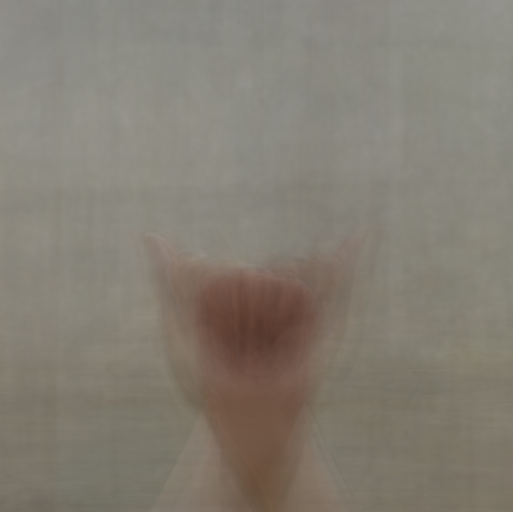

'A.png'

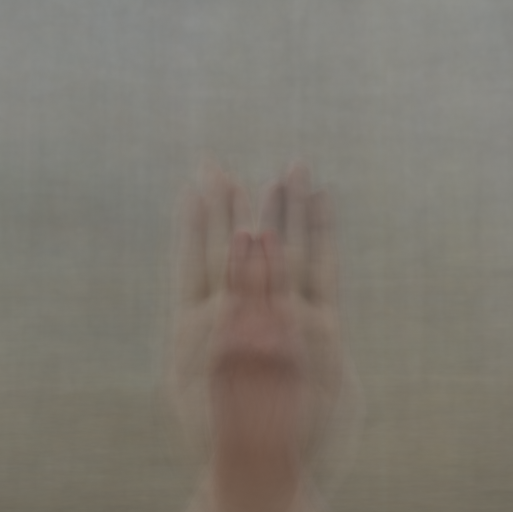

'B.png'

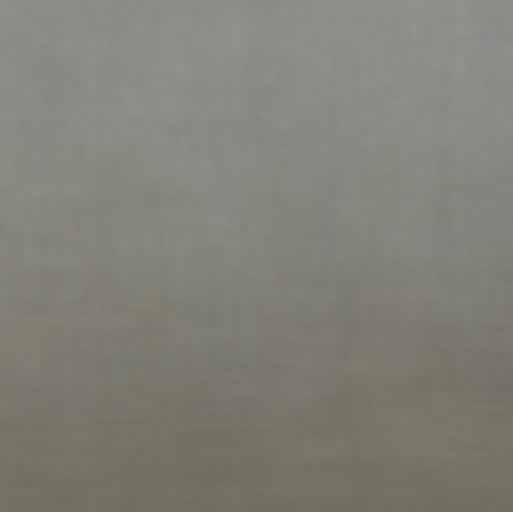

'Blank.png'

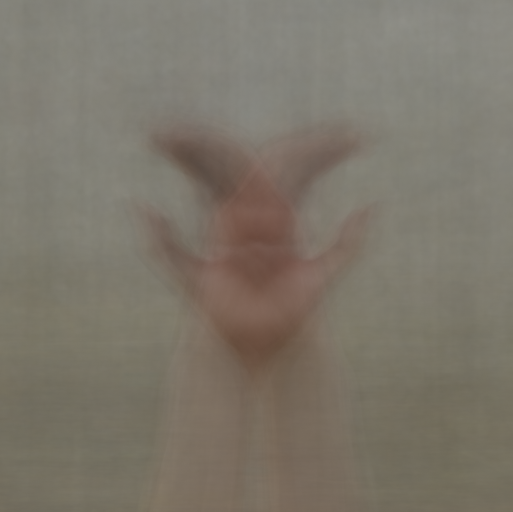

'C.png'

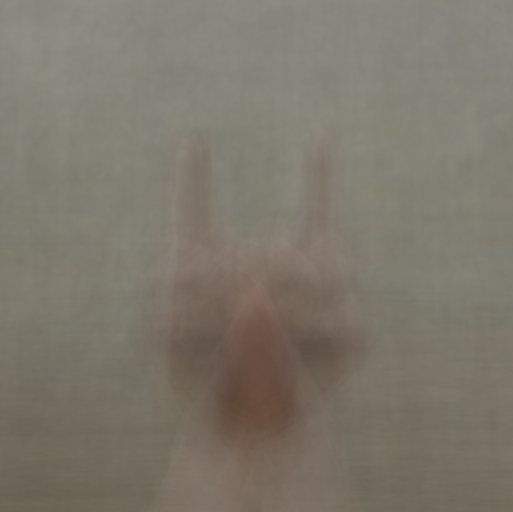

'D.png'

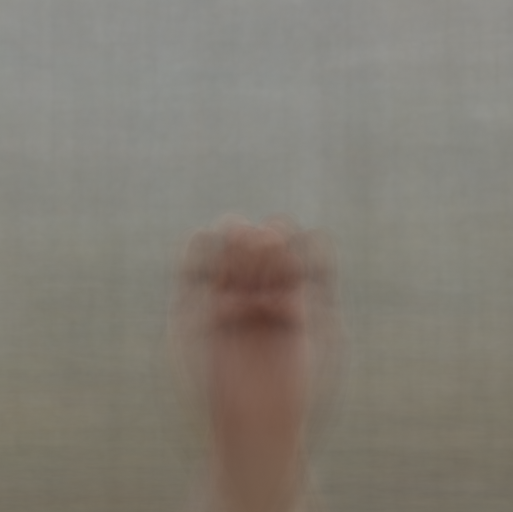

'E.png'

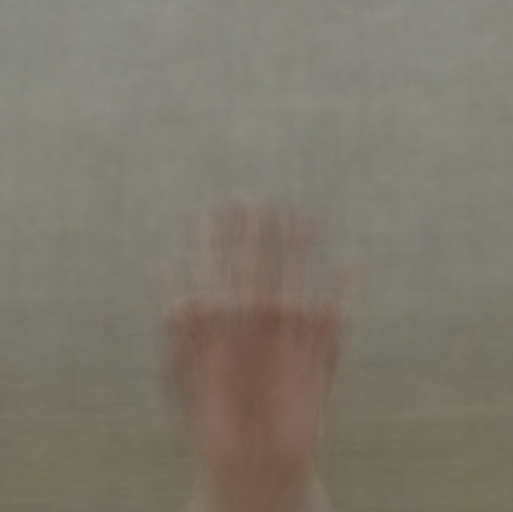

'F.png'

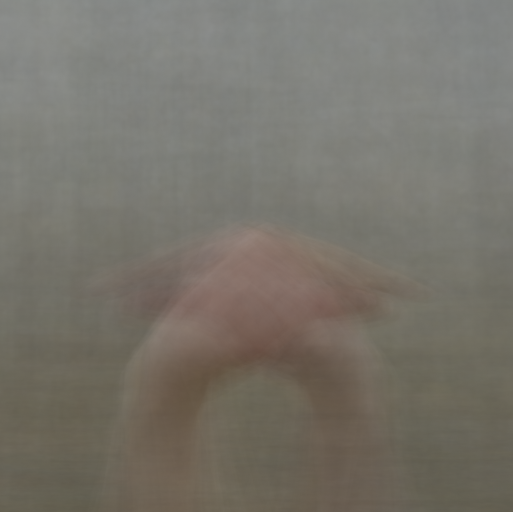

'G.png'

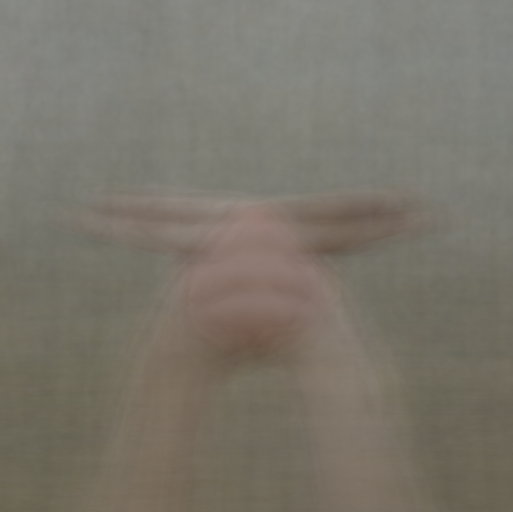

'H.png'

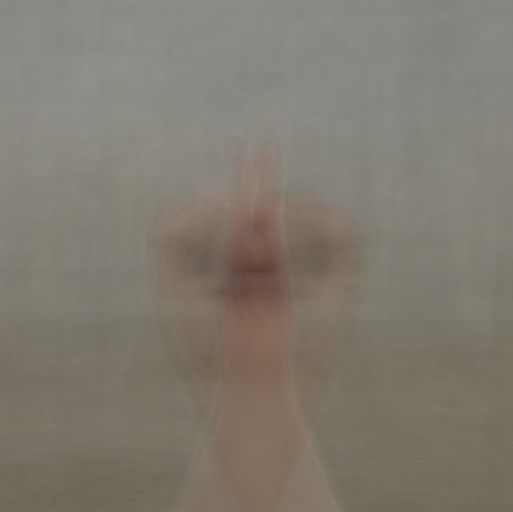

'I.png'

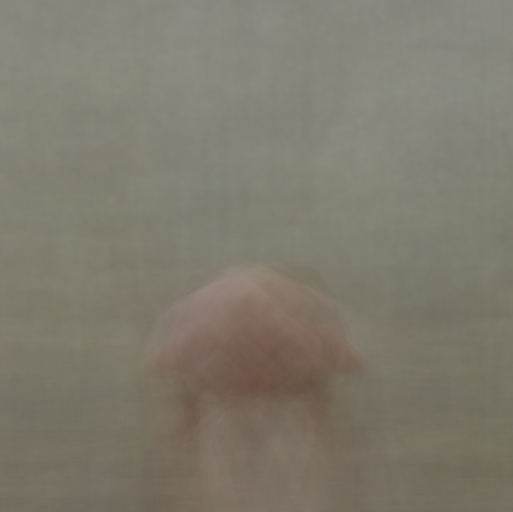

'J.png'

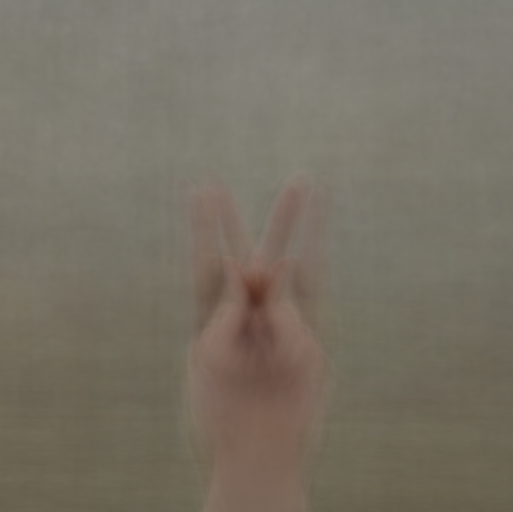

'K.png'

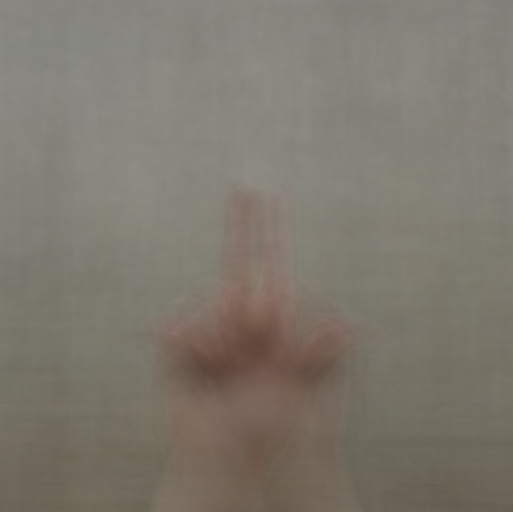

'L.png'

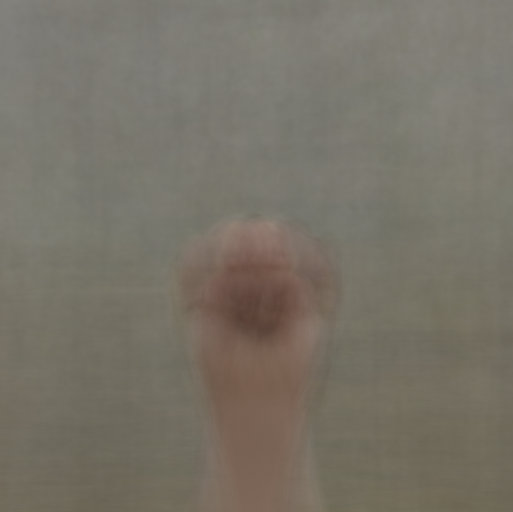

'M.png'

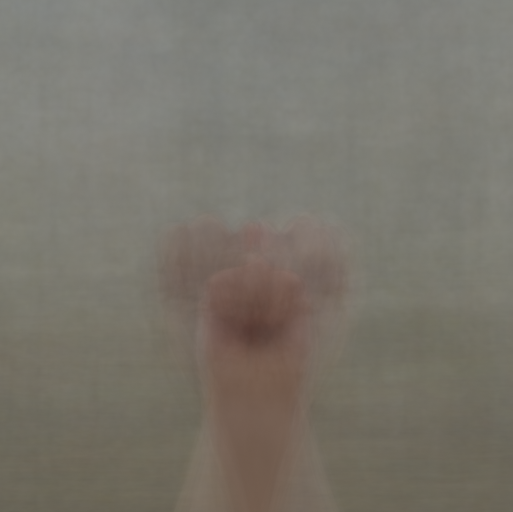

'N.png'

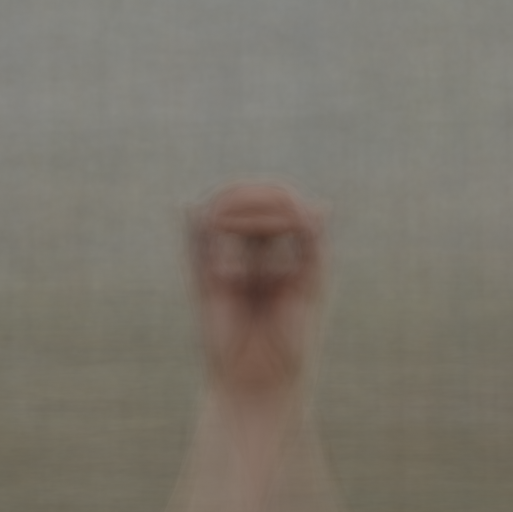

'O.png'

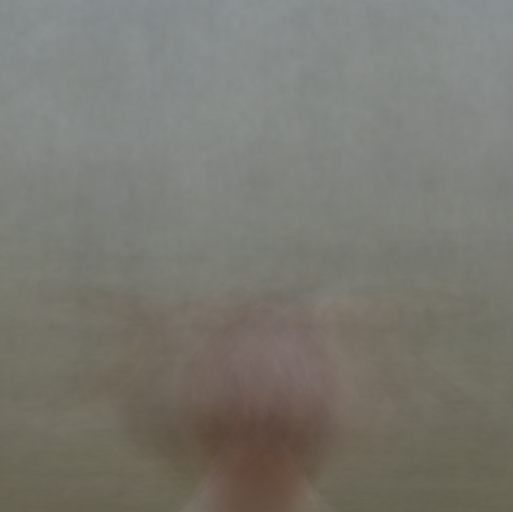

'P.png'

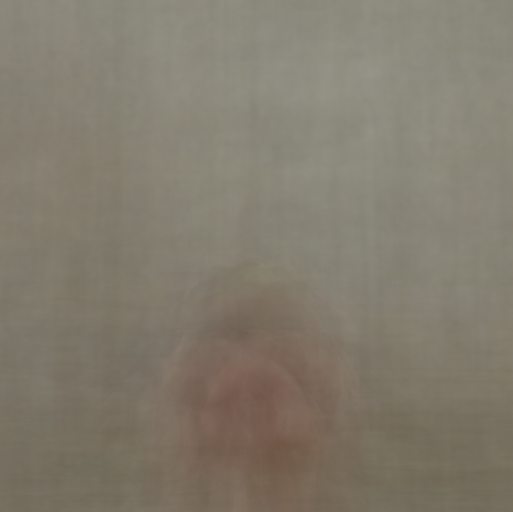

'Q.png'

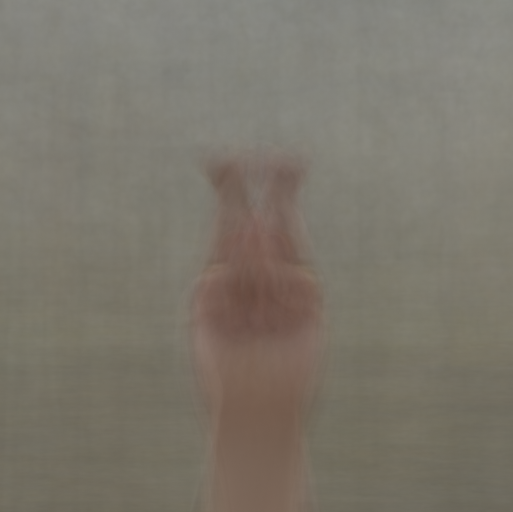

'R.png'

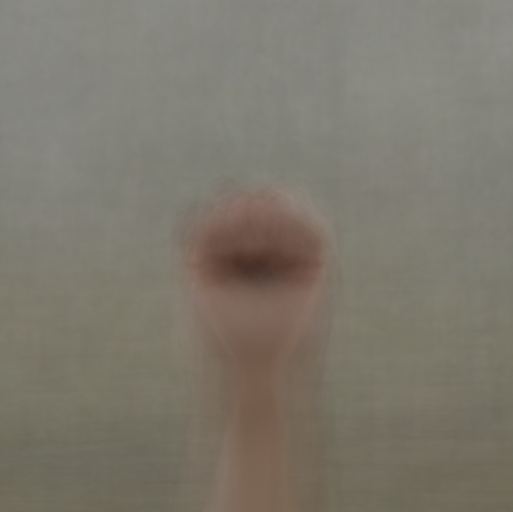

'S.png'

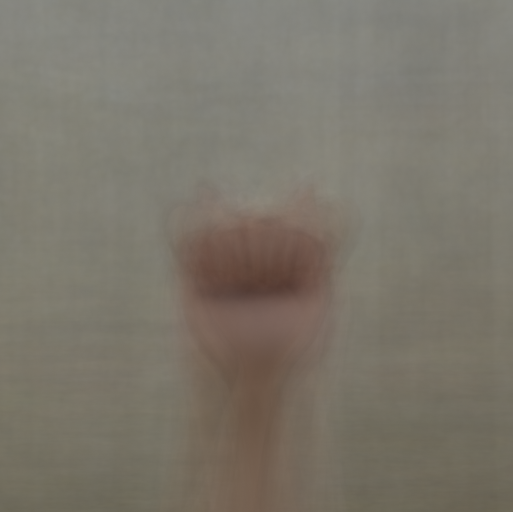

'T.png'

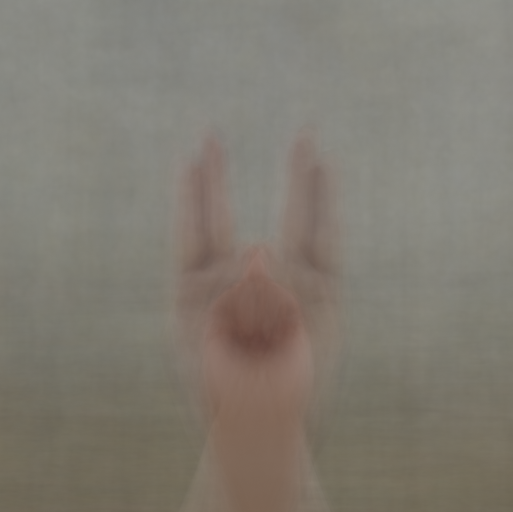

'U.png'

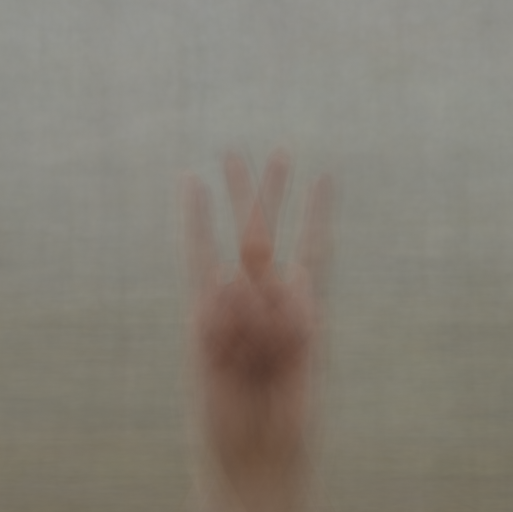

'V.png'

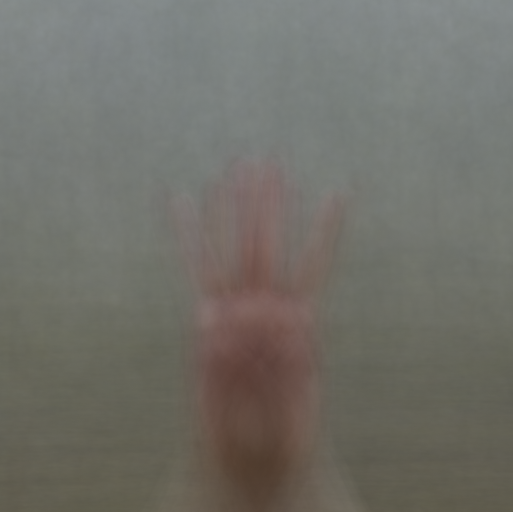

'W.png'

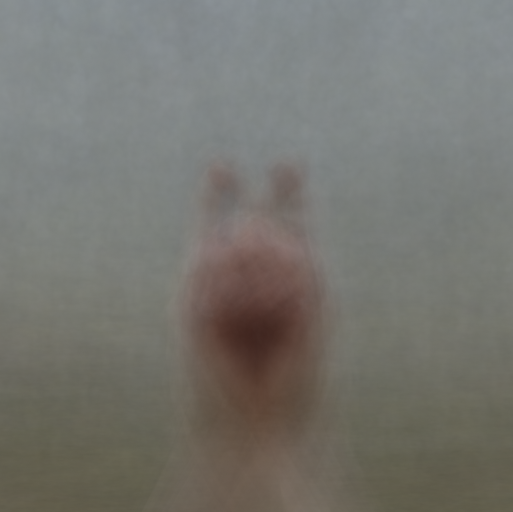

'X.png'

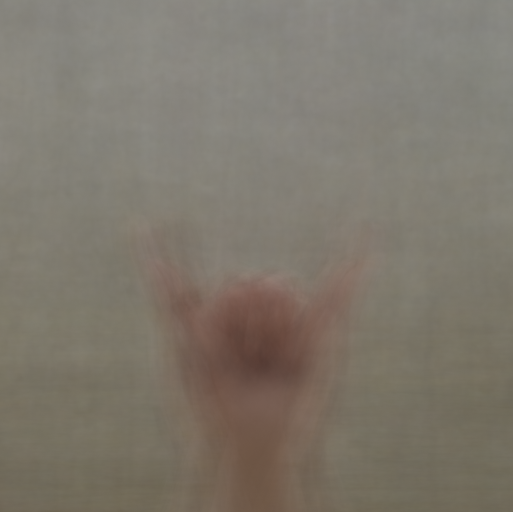

'Y.png'

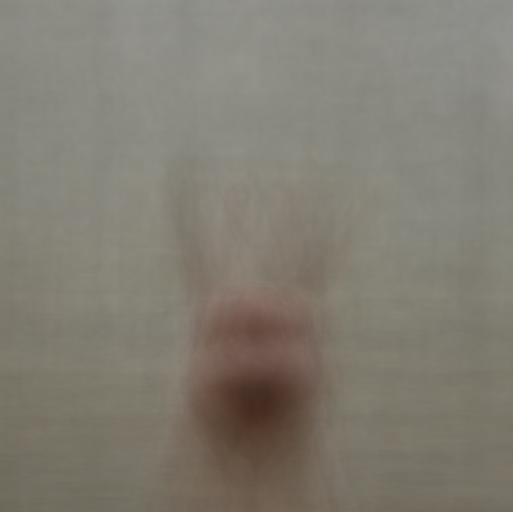

'Z.png'

In [3]:
import os
from PIL import Image

# specify the directory containing the images

# loop through all files in the directory
for filename in os.listdir(output_folder):
    # check if the file is a png image
    if filename.endswith(".png"):
        # extract the title from the file name
        title = filename.split("_")[0]
        # open the image using PIL
        image = Image.open(os.path.join(output_folder, filename))
        # display the image with its title
        display(image)
        display(title)


## Examples + Distribution
Here we show specific examples of pictures we have for each letter.<br>
Furthermore we show the distribution of the data wich is not that interesting since we created a dataset with even amounts <br> of images for each letter.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


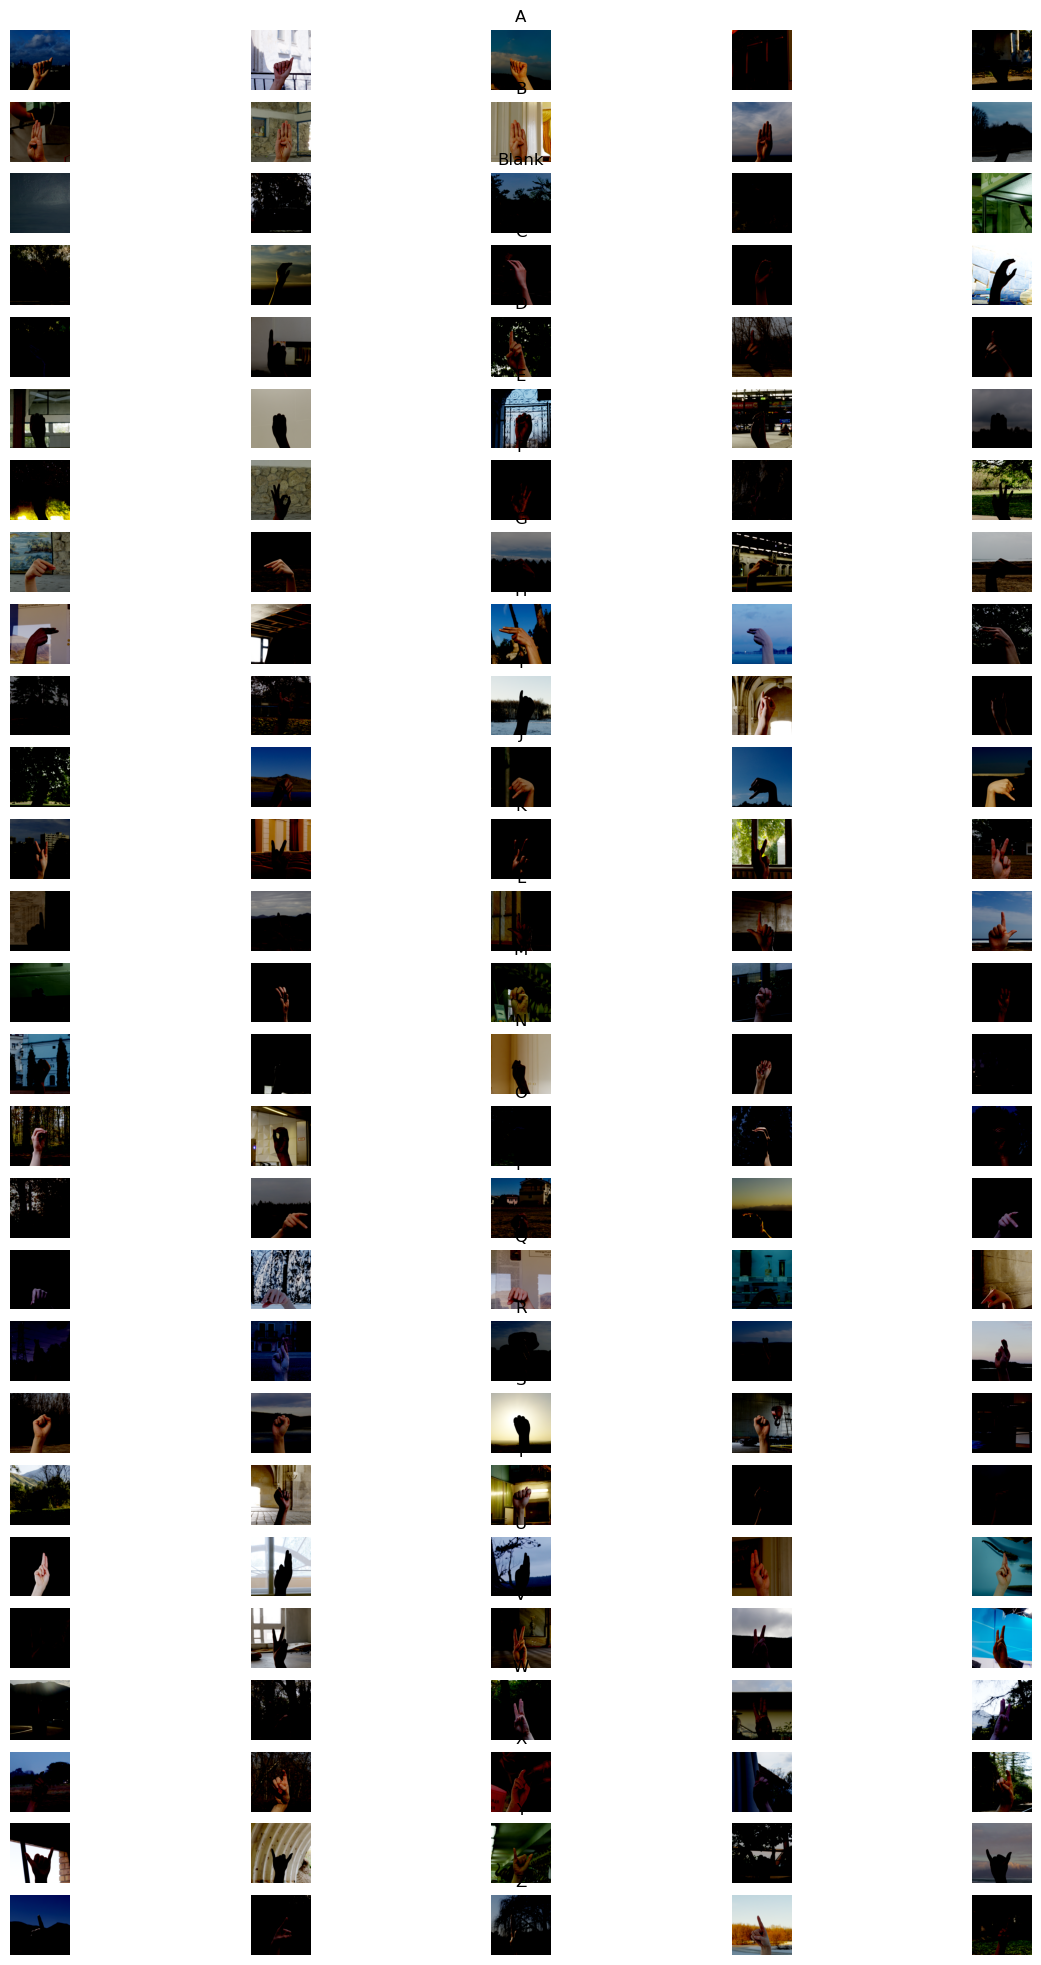

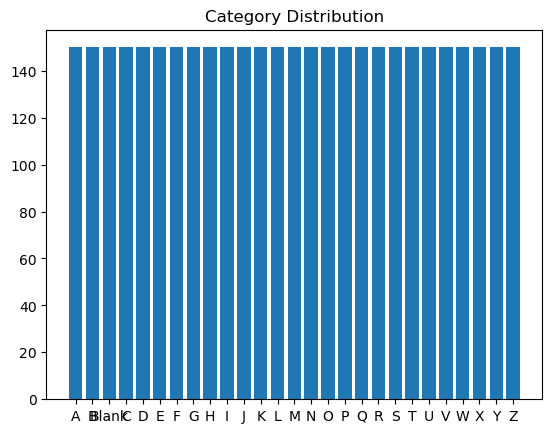

In [4]:
from torch.utils.data import Subset
transform = Compose([Resize((513,512)), ToTensor(), Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])
batch_size = 30
# Create the dataset and dataloader
train_dataset = ImageFolder('images/train', transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

class_names = train_dataset.classes
# Create a subset of the dataset for each category
category_datasets = []
for i in range(len(class_names)):
    category_indices = np.where(np.array(train_dataset.targets) == i)[0]
    category_dataset = Subset(train_dataset, category_indices)
    category_datasets.append(category_dataset)

# Visualize a random sample of images from each category
fig, axs = plt.subplots(len(class_names), 5, figsize=(15, 25))
for i in range(len(class_names)):
    category = class_names[i]
    images = category_datasets[i]
    samples = np.random.choice(len(images), 5, replace=False)
    for j, ax in enumerate(axs[i]):
        image, _ = images[samples[j]]
        ax.imshow(image.permute(1, 2, 0))
        ax.axis('off')
        if j == 2:
            ax.set_title(category)
    print()
    print()
    print()
plt.show()

# Visualize the distribution of the categories
class_counts = [len(category_datasets[i]) for i in range(len(class_names))]
plt.bar(class_names, class_counts)
plt.title('Category Distribution')
plt.show()

## Image Sharpness
This measure shows the clarity of our images where the optimal value is 50% anything over 90% or under 10% is fairly bad.

In [5]:
import torch
import torchvision.transforms.functional as TF
import numpy as np
from PIL import Image, ImageStat
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import statistics


def image_sharpness(image):
    # Convert the image to grayscale
    grayscale = torch.mean(image, dim=0, keepdim=True)
    
    # Create a 3x3 Laplacian filter kernel
    laplacian_kernel = torch.tensor([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=torch.float32)
    
    # Apply the Laplacian filter to the grayscale image
    laplacian = torch.nn.functional.conv2d(grayscale, laplacian_kernel.view(1, 1, 3, 3))
    
    # Calculate the variance of the Laplacian image
    sharpness = torch.var(laplacian)
    
    return sharpness.item()


categories_sharpness = pd.DataFrame(columns = [["Category", "Average Sharpness", "STD of Sharpness"]])

# Create the dataset and dataloader
train_dataset = ImageFolder('images/train', transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle = True)

# Get the class names and their indices
class_names = train_dataset.classes
class_indices = train_dataset.class_to_idx

category_number = 0
for i, class_name in enumerate(class_names):
    class_index = class_indices[class_name]
    count = 0
    sum_sharpness = 0
    values = []
    for batch_idx, (data, targets) in enumerate(train_dataloader):
        if class_index in targets:
            for j in range(len(targets)):
                if targets[j] == class_index:
                    count += 1
                    if count <= 50:
                        sharpness = image_sharpness(data[j])
                        values.append(sharpness)
                        sum_sharpness += sharpness
        if count == 50:
            categories_sharpness.loc[category_number,"Average Sharpness"] = sum_sharpness / 50
            categories_sharpness.loc[category_number,"Category"] = class_name
            categories_sharpness.loc[category_number,"STD of Sharpness"] = statistics.stdev(values)
            category_number += 1
            break

In [6]:
categories_sharpness

Category Average Sharpness STD of Sharpness
0         A          0.001627         0.001334
1         B          0.001825          0.00099
2     Blank          0.001492         0.001231
3         C          0.001943         0.001059
4         D          0.002331         0.001417
5         E          0.001646         0.001073
6         F          0.002247         0.002062
7         G          0.002158         0.001432
8         H           0.00223         0.001537
9         I          0.002104         0.001607
10        J          0.001835         0.001576
11        K          0.001869         0.001307
12        L          0.001888         0.001321
13        M          0.001965         0.001383
14        N          0.001584         0.001039
15        O          0.002032         0.001287
16        P          0.001883         0.001151
17        Q          0.001931         0.001535
18        R          0.001957          0.00104
19        S          0.001539          0.00097
20        T          0.001822         0.001401
21        U          0.001718         0.000889
22        V          0.001891         0.001187
23        W           0.00193         0.001253
24        X          0.002272         0.001321
25        Y          0.001828         0.001256
26        Z          0.001949         0.001315

We can see that our sharpness measure is fairly bad for all letters, we suspect this is because we redused the size <br>
of the images for computing reasons.

# Network Creation
Below  are our three network classes with which we are trying to build our network:<br>
1) Fully Connected Linear Model - with options for batch normalization and drop out.<br>
2) Basic CNN Model<br>
3) CNN Model with Batch Normilization and Drop out.

## Fully Connected Linear Model
In the chunk below you can see that we have a dynamic network that allows to input different hidden layers.<br>
Furthermore we can choose whether to add batch normalization (yes or no) and drop rates (can choose).

In [7]:
class FC_Networks(torch.nn.Module):
    def __init__(self, input_size=48*48*3, hidden_sizes=[1500, 900], output_size=27, batch_norm=False, drop_out=False):
        super(FC_Networks, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        
        # Create a list of fully connected layers
        self.fc_layers = nn.ModuleList([nn.Linear(input_size, hidden_sizes[0])])
        
        # Add additional fully connected layers
        for i in range(len(hidden_sizes) - 1):
            self.fc_layers.append(torch.nn.ReLU())
            if batch_norm:
                self.fc_layers.append(torch.nn.BatchNorm1d(hidden_sizes[i]))
            if drop_out:
                self.fc_layers.append(torch.nn.Dropout(drop_out))
            self.fc_layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
        
        # Add the final fully connected layer
        self.fc_layers.append(torch.nn.ReLU())
        if batch_norm:
            self.fc_layers.append(torch.nn.BatchNorm1d(hidden_sizes[-1]))
        if drop_out:
            self.fc_layers.append(torch.nn.Dropout(drop_out))
        self.fc_layers.append(nn.Linear(hidden_sizes[-1], output_size))
        self.fc_layers.append(torch.nn.Softmax(dim=1))
        
    def forward(self, x):
        x = x.view(-1, self.input_size)
        for layer in self.fc_layers:
            x = layer(x)
        return x


## Basic CNN Model
For this model we set hidden layer values and cnn values.<br>
We know that this might not give the most accurate results but given the time and computing power at our uses this was our decision.

In [8]:
class CNN_MP_Net(torch.nn.Module):
    def __init__(self):
        super(CNN_MP_Net,self).__init__()

        self.conv1 = torch.nn.Conv2d(in_channels=3,out_channels=12,kernel_size=5, padding=2) 
        # input: 3,48,48. Output: 12,48,48
        self.relu1 = torch.nn.ReLU() 
        # input: 12,48,48. Output: 12,48,48
        self.max_pool1 = torch.nn.MaxPool2d(kernel_size=2)
        # input: 12,48,48. Output: 12,24,24
        self.conv2 = torch.nn.Conv2d(in_channels=12, out_channels=48, kernel_size=5, padding=2) 
        # input: 12,24,24. Output: 48,24,24
        self.relu2 = torch.nn.ReLU()
        self.max_pool2 = torch.nn.MaxPool2d(kernel_size=2)
        # input: 48,24,24. Output: 48,12,12
        
        # Creation of linear layers
        self.fc1 = torch.nn.Linear(int(48*12*12), 1500) 
        self.relu3 = torch.nn.ReLU() 
        
        self.fc2 = torch.nn.Linear(1500,900)
        self.relu4 = torch.nn.ReLU()
        
        self.fc3 = torch.nn.Linear(900,27)
        self.softmax = torch.nn.LogSoftmax(dim=1)
        
    def forward(self,x):        
        x = x.view(-1,3,48,48)
        batch_size = x.shape[0]
        x = self.relu1(self.conv1(x))
        x = self.max_pool1(x)
        x = self.relu2(self.conv2(x))
        x = self.max_pool2(x)
        x = x.view(batch_size, -1)
        x = self.relu3(self.fc1(x))
        x = self.relu4(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x


## Fully Connected CNN Model- with Batch_Norm and Drop_Out 
For this model we set hidden layer values and cnn values.<br>
We know that this might not give the most accurate results but given the time and computing power at our uses this was our decision.

In [9]:
class Full_Convo_Net(torch.nn.Module):
    def __init__(self):
        super(Full_Convo_Net, self).__init__()

        self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=12, kernel_size=5, padding=2) 
        # input: 3,513,512. Output:  12,513,512
        self.relu1 = torch.nn.ReLU() 
        # input: 12,513,512. Output:  12,513,512
        self.max_pool1 = torch.nn.MaxPool2d(kernel_size=2) 
        # input: 12,513,512 outut: 12,256,256
        self.conv2 = torch.nn.Conv2d(in_channels=12, out_channels=48, kernel_size=5, padding=2) 
        # input: 12,256,256. Output:  48,256,256
        self.relu2 = torch.nn.ReLU()

        self.max_pool2 = torch.nn.MaxPool2d(kernel_size=2) 
        # input: 48,256,256. Output:  48,128,128

        self.fc1 = torch.nn.Linear(int(48*(48/2/2)*(48/2/2)), 1500)
        self.relu3 = torch.nn.ReLU() 
        self.batch_norm1 = torch.nn.BatchNorm1d(1500)
        self.drop_out1 = torch.nn.Dropout(0.5)

        self.fc2 = torch.nn.Linear(1500, 900)
        self.relu4 = torch.nn.ReLU()
        self.batch_norm2 = torch.nn.BatchNorm1d(900)        
        self.drop_out2 = torch.nn.Dropout(0.5)

        self.fc3 = torch.nn.Linear(900, 27) # change the output to 27 categories
        self.softmax = torch.nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 3, 48, 48) 
        batch_size = x.shape[0] 
        x = self.relu1(self.conv1(x))
        x = self.max_pool1(x)
        x = self.relu2(self.conv2(x))
        x = self.max_pool2(x)
        x = x.view(batch_size, -1) 
        x = self.relu3(self.fc1(x))
        x = self.batch_norm1(x)
        x = self.drop_out1(x)
        x = self.relu4(self.fc2(x))
        x = self.batch_norm2(x)
        x = self.drop_out2(x)
        x = self.softmax(self.fc3(x))
        return x

# Comparinng Models
Before we move on to training a model with a crazy amount of epochs we decided to check the accuracy and loss of each model<br> 
after 10 epochs and from there try and optimize the best model. In a previous notebook we tried using various hidden layers <br>
and found that other than our default model layers two other layer stood out - [3456,1728,864,432] & [3469,1728] so these are the<br>
layers we are testing at this stage.

## Initializing The Models We're Testing

In [10]:
trial_models =[FC_Networks().to(device=device),                # fully connected network no batcc_norm or drop_out
                FC_Networks(batch_norm=True).to(device=device),# fully connected with batch_norm
                FC_Networks(batch_norm=True, hidden_sizes = [3456,1728,864,432]).to(device=device),
                FC_Networks(batch_norm=True, hidden_sizes = [3469,1728]).to(device=device),
                FC_Networks(drop_out=0.5).to(device=device),   # fully connected with drop_out
                FC_Networks(batch_norm =True,drop_out=0.5).to(device=device), #fully connected+batch_norm_drop_out
                CNN_MP_Net().to(device=device),                # cnn network with max_pooling
                Full_Convo_Net().to(device=device)]            # cnn netwrok with max_pooling, batch_norm, & drop_out

models_results = pd.DataFrame(columns=['Model_Number', 'Validation_Accuracy', 'Actual_Model'])

## Training the Models and Checking the Validation Accuracy

In [11]:
i=1
for model in trial_models:
    print("-------------------------------------------------------------")
    print("Model Number {} of {} models".format(i,len(trial_models)))
    # Define the transform to be applied to the images
    transform = Compose([Resize((48,48)), ToTensor(), Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])
    batch_size = 150

    # Create the dataset and dataloader
    train_dataset = ImageFolder('images/train', transform=transform)
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Move the model to the device
    model.to(device)

    # Define the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.00001)

    # Train the model
    for epoch in range(10):
        running_loss = 0.0
        for inputs, labels in train_dataloader:
            # Move the inputs and labels to the device
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Update the running loss
            running_loss += loss.item() * inputs.size(0)

        # Print the training loss for the epoch
        print('Epoch {}: Loss = {:.4f}'.format(epoch+1, running_loss/len(train_dataset)))
        # set the model to evaluation mode
    model.eval()

    # define the validation dataset and dataloader
    val_dataset = datasets.ImageFolder(root='images/validation', transform=transform)
    val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

    # initialize variables for accuracy calculation
    correct = 0
    total = 0

    # disable gradient calculation for inference
    with torch.no_grad():
        # iterate over validation dataset
        for images, labels in val_dataloader:
            # move images and labels to device
            images, labels = images.to(device), labels.to(device)

            # forward pass to get model outputs
            outputs = model(images)

            # get predicted class from model outputs
            _, predicted = torch.max(outputs.data, 1)

            # update accuracy counters
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # calculate accuracy
    accuracy = 100 * correct / total
    print('')
    print('Validation accuracy for model number {}: {:.2f}%'.format(i, accuracy))
    print('')
    new_row = {'Model_Number': i, 'Validation_Accuracy': accuracy, 'Actual_Model': model}
    models_results = models_results.append(new_row,ignore_index=True)
    i+=1

-------------------------------------------------------------
Model Number 1 of 8 models
Epoch 1: Loss = 3.2956
Epoch 2: Loss = 3.2944
Epoch 3: Loss = 3.2929
Epoch 4: Loss = 3.2903
Epoch 5: Loss = 3.2868
Epoch 6: Loss = 3.2826
Epoch 7: Loss = 3.2788
Epoch 8: Loss = 3.2740
Epoch 9: Loss = 3.2697
Epoch 10: Loss = 3.2653

Validation accuracy for model number 1: 8.44%

-------------------------------------------------------------
Model Number 2 of 8 models
Epoch 1: Loss = 3.2887
Epoch 2: Loss = 3.2555
Epoch 3: Loss = 3.2233
Epoch 4: Loss = 3.1893
Epoch 5: Loss = 3.1543
Epoch 6: Loss = 3.1210
Epoch 7: Loss = 3.0905
Epoch 8: Loss = 3.0612
Epoch 9: Loss = 3.0336
Epoch 10: Loss = 3.0052

Validation accuracy for model number 2: 27.48%

-------------------------------------------------------------
Model Number 3 of 8 models
Epoch 1: Loss = 3.2874
Epoch 2: Loss = 3.2370
Epoch 3: Loss = 3.1852
Epoch 4: Loss = 3.1272
Epoch 5: Loss = 3.0720
Epoch 6: Loss = 3.0188
Epoch 7: Loss = 2.9659
Epoch 8: Loss

## Validation Results After 10 Epochs

In [12]:
models_results

Model_Number  Validation_Accuracy  \
0            1             8.444444   
1            2            27.481481   
2            3            32.222222   
3            4            35.851852   
4            5             4.518519   
5            6            11.777778   
6            7            12.814815   
7            8            22.888889   

                                        Actual_Model  
0  FC_Networks(\n  (fc_layers): ModuleList(\n    ...  
1  FC_Networks(\n  (fc_layers): ModuleList(\n    ...  
2  FC_Networks(\n  (fc_layers): ModuleList(\n    ...  
3  FC_Networks(\n  (fc_layers): ModuleList(\n    ...  
4  FC_Networks(\n  (fc_layers): ModuleList(\n    ...  
5  FC_Networks(\n  (fc_layers): ModuleList(\n    ...  
6  CNN_MP_Net(\n  (conv1): Conv2d(3, 12, kernel_s...  
7  Full_Convo_Net(\n  (conv1): Conv2d(3, 12, kern...

**Per Computing Restraints we are choosing to continue with model number 4 which is a fully connected linear model with**<br>
**batch normalization and hidden layers of: [3469,1728]**

# Continuation Of Model Training

## Saving the Best Model 

In [13]:
best_model = models_results['Validation_Accuracy'].idxmax()
chosen_model = models_results["Actual_Model"].iloc[best_model]

## Retraining the Model With 30 Epochs

In [97]:
retrained_chosen_model = trial_models[best_model]
epoch_loss = pd.DataFrame(columns=[["Epoch Number", "Loss"]])
epoch_loss["Epoch Number"] = range(1,30)


print("-------------------------------------------------------------")
# Define the transform to be applied to the images
transform = Compose([Resize((48,48)), ToTensor(), Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])
batch_size = 150

# Create the dataset and dataloader
train_dataset = ImageFolder('images/train', transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Move the model to the device
retrained_chosen_model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(retrained_chosen_model.parameters(), lr=0.00001)

# Train the model
for epoch in range(30):
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Move the inputs and labels to the device
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = retrained_chosen_model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Update the running loss
        running_loss += loss.item() * inputs.size(0)

    # Print the training loss for the epoch
    print('Epoch {}: Loss = {:.4f}'.format(epoch+1, running_loss/len(train_dataset)))
    epoch_loss.loc[epoch, "Loss"] = running_loss/len(train_dataset)
    # set the model to evaluation mode
retrained_chosen_model.eval()

# define the validation dataset and dataloader
val_dataset = datasets.ImageFolder(root='images/validation', transform=transform)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

# initialize variables for accuracy calculation
correct = 0
total = 0

# disable gradient calculation for inference
with torch.no_grad():
    # iterate over validation dataset
    for images, labels in val_dataloader:
        # move images and labels to device
        images, labels = images.to(device), labels.to(device)

        # forward pass to get model outputs
        outputs = retrained_chosen_model(images)

        # get predicted class from model outputs
        _, predicted = torch.max(outputs.data, 1)

        # update accuracy counters
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# calculate accuracy
accuracy = 100 * correct / total
print('')
print('Validation accuracy for the chosen model: {:.2f}%'.format(accuracy))
print('')

-------------------------------------------------------------
Epoch 1: Loss = 2.4413
Epoch 2: Loss = 2.4261
Epoch 3: Loss = 2.4177
Epoch 4: Loss = 2.4135
Epoch 5: Loss = 2.4089
Epoch 6: Loss = 2.4054
Epoch 7: Loss = 2.4009
Epoch 8: Loss = 2.3985
Epoch 9: Loss = 2.3968
Epoch 10: Loss = 2.3932
Epoch 11: Loss = 2.3902
Epoch 12: Loss = 2.3875
Epoch 13: Loss = 2.3840
Epoch 14: Loss = 2.3824
Epoch 15: Loss = 2.3817
Epoch 16: Loss = 2.3800
Epoch 17: Loss = 2.3788
Epoch 18: Loss = 2.3778
Epoch 19: Loss = 2.3773
Epoch 20: Loss = 2.3752
Epoch 21: Loss = 2.3746
Epoch 22: Loss = 2.3765
Epoch 23: Loss = 2.3741
Epoch 24: Loss = 2.3729
Epoch 25: Loss = 2.3721
Epoch 26: Loss = 2.3723
Epoch 27: Loss = 2.3719
Epoch 28: Loss = 2.3707
Epoch 29: Loss = 2.3723
Epoch 30: Loss = 2.3704

Validation accuracy for the chosen model: 62.67%



**We're able to see that after running the model with 30 epoch we reached 63% accuracy!**

# Evalutation Model Results

## Plotting Loss Over Epochs

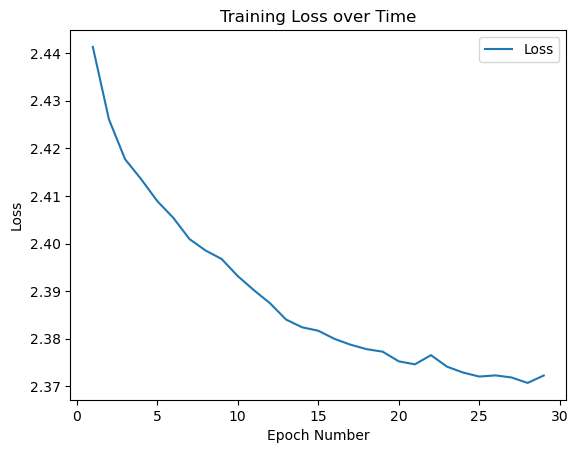

In [98]:
epoch_loss.to_csv('epoch_loss.csv')

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
epoch_loss = pd.read_csv('epoch_loss.csv')

# Create a line plot of the loss data over time
epoch_loss.plot.line(x='Epoch Number', y='Loss')

# Add labels for the x and y axes and a title for the plot
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('Training Loss over Time')

# Display the plot
plt.show()


## Checking Test
Here we see the test accuracy as a whole and the accuracy obtained for each letter

In [198]:
# define the validation dataset and dataloader
test_dataset = datasets.ImageFolder(root='images/test', transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

true_labels = list()
predicted_labels = list()

# initialize variables for accuracy calculation
correct = {category: 0 for category in test_dataset.classes}
total = {category: 0 for category in test_dataset.classes}

total_images = 0
correct_images = 0

pred_category_acc = pd.DataFrame(columns=[["Category", "Accuracy"]])
pred_category_acc["Category"] = train_dataset.classes

# disable gradient calculation for inference
with torch.no_grad():
    # iterate over validation dataset
    for images, labels in test_dataloader:
        true_labels.append(np.array(labels))
        # move images and labels to device
        images, labels = images.to(device), labels.to(device)

        # forward pass to get model outputs
        outputs = retrained_chosen_model(images)

        # get predicted class from model outputs
        _, predicted = torch.max(outputs.data, 1)
        predicted_labels.append(np.array(predicted))
        # update accuracy counters
        total_images += labels.size(0)
        correct_images += (predicted == labels).sum().item()
        
        # update accuracy counters for each category
        for category in test_dataset.classes:
            category_indices = labels == test_dataset.class_to_idx[category]
            total[category] += category_indices.sum().item()
            correct[category] += (predicted[category_indices] == labels[category_indices]).sum().item()

# calculate accuracy for each category
category_accuracies = {category: 100 * correct[category] / total[category] for category in test_dataset.classes}

# calculate accuracy
accuracy = 100 * correct_images / total_images

print('')
print('Test accuracy for the final model: {:.2f}%'.format(accuracy))
print('')
i=0
# print accuracy for each category
for category, accuracy in category_accuracies.items():
    print('Test accuracy for category {}: {:.2f}%'.format(category, accuracy))
    pred_category_acc.loc[i,"Accuracy"] = accuracy
    i+=1


Test accuracy for the final model: 63.30%

Test accuracy for category A: 54.00%
Test accuracy for category B: 69.00%
Test accuracy for category Blank: 75.00%
Test accuracy for category C: 80.00%
Test accuracy for category D: 67.00%
Test accuracy for category E: 57.00%
Test accuracy for category F: 62.00%
Test accuracy for category G: 65.00%
Test accuracy for category H: 79.00%
Test accuracy for category I: 80.00%
Test accuracy for category J: 59.00%
Test accuracy for category K: 70.00%
Test accuracy for category L: 71.00%
Test accuracy for category M: 46.00%
Test accuracy for category N: 53.00%
Test accuracy for category O: 75.00%
Test accuracy for category P: 51.00%
Test accuracy for category Q: 27.00%
Test accuracy for category R: 71.00%
Test accuracy for category S: 66.00%
Test accuracy for category T: 68.00%
Test accuracy for category U: 71.00%
Test accuracy for category V: 59.00%
Test accuracy for category W: 51.00%
Test accuracy for category X: 61.00%
Test accuracy for category 

## Final Model Build

In [191]:
retrained_chosen_model

FC_Networks(
  (fc_layers): ModuleList(
    (0): Linear(in_features=6912, out_features=3469, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(3469, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=3469, out_features=1728, bias=True)
    (4): ReLU()
    (5): BatchNorm1d(1728, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=1728, out_features=27, bias=True)
    (7): Softmax(dim=1)
  )
)

## Plot of Accuracy Per Letter

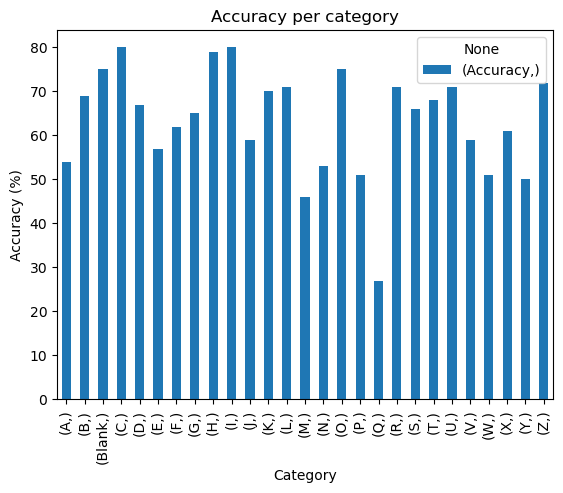

In [100]:
pred_category_acc.set_index('Category', inplace=True)
pred_category_acc.plot.bar(y='Accuracy')
plt.xlabel('Category')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy per category')
plt.show()

## Heat Map Showing the Confusion Matrix of Letter Prediction

In [203]:
true_labels = np.concatenate(true_labels)
predicted_labels = np.concatenate(predicted_labels)

In [223]:
letter_dict = {0: 'A', 1: 'B', 2: 'Blank', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J', 11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O', 16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'T', 21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y', 26: 'Z'}

In [224]:
true_labels_letters = [letter_dict[num] for num in true_labels]
predicted_labels_letters = [letter_dict[num] for num in predicted_labels]

In [233]:
letter_labels = np.unique(np.concatenate((true_labels_letters, predicted_labels_letters)))

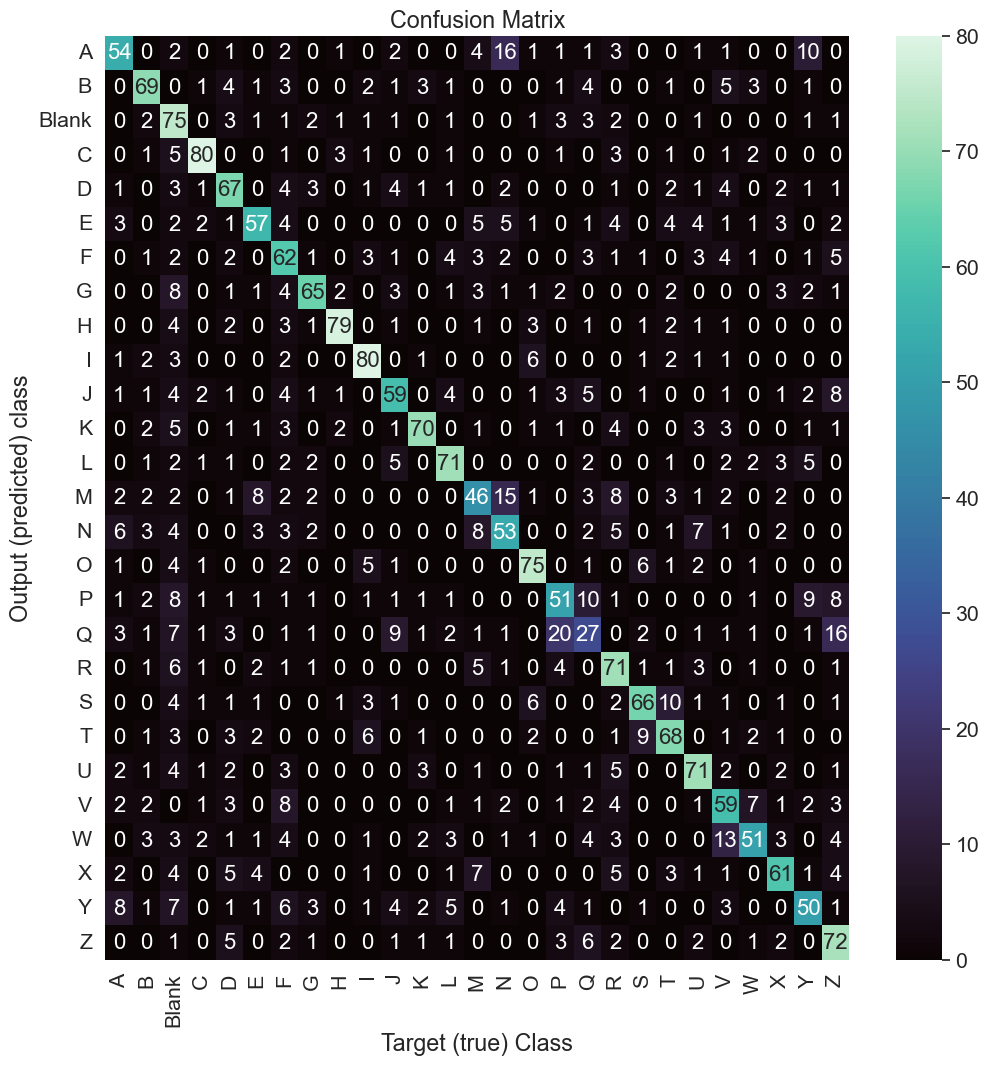

In [235]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat_letter = confusion_matrix(y_true=true_labels_letters, y_pred=predicted_labels_letters)
plt.subplots(figsize=(12,12))
sns.set(font_scale=1.4) # for label size
sns.heatmap(conf_mat_letter, annot=True, fmt=".0f", annot_kws={"size": 16},cmap='mako', cbar=True,
           xticklabels=letter_labels, yticklabels=letter_labels) # font size
plt.xlabel('Target (true) Class'); plt.ylabel('Output (predicted) class'); plt.title('Confusion Matrix')
plt.show()

# A little Test We Decided To Run

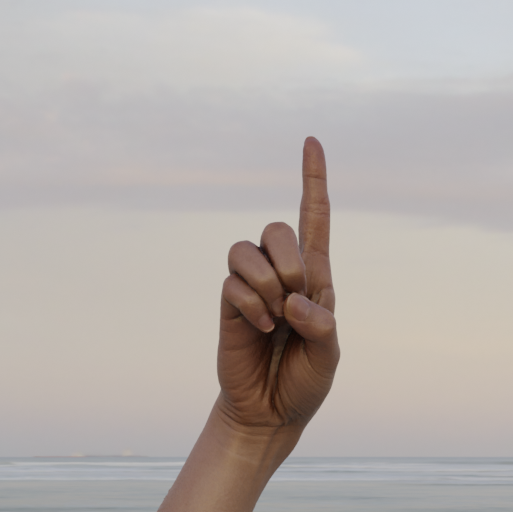

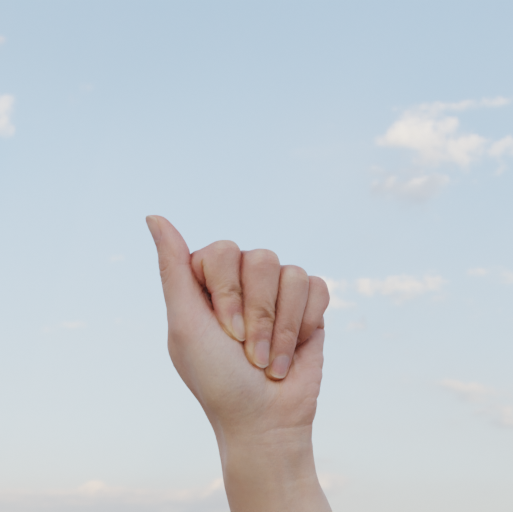

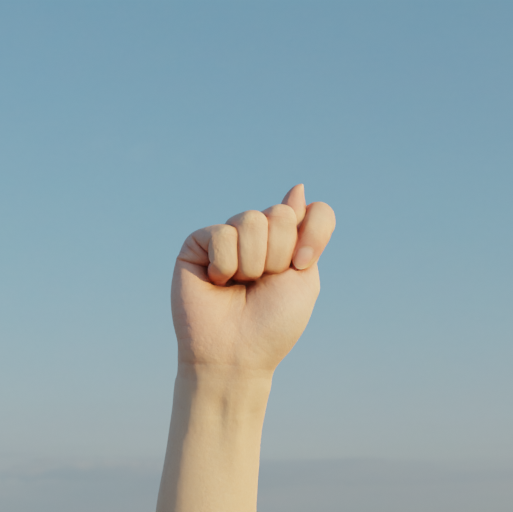

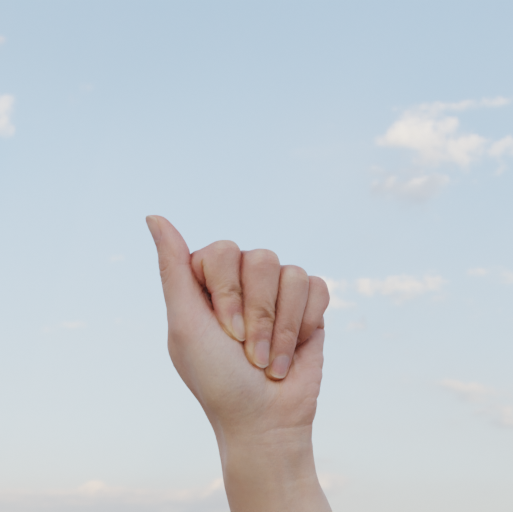

Your Word is:  DATA


In [190]:
word = list()
my_word = ''
# Load the image
image_path = "images/My_Test/D/My_D.png"
image = Image.open(image_path)
word.append(image)
image_path = "images/My_Test/A/My_A.png"
image = Image.open(image_path)
word.append(image)
image_path = "images/My_Test/T/My_T.png"
image = Image.open(image_path)
word.append(image)
image_path = "images/My_Test/A/My_A.png"
image = Image.open(image_path)
word.append(image)
for i in range(len(word)):
    display(word[i])
    # Preprocess the image and convert it to a tensor
    tensor = transform(word[i]).unsqueeze(0)

    retrained_chosen_model.eval()

    # Pass the tensor through the model to obtain a prediction
    output = retrained_chosen_model(tensor)

    # Get the index of the predicted class
    _, predicted = torch.max(output.data, 1)

    # Map the index to the corresponding class label using a dictionary
    class_labels = train_dataset.classes
    predicted_class = class_labels[predicted.item()]
    my_word += str(predicted_class)
print("Your Word is: ",my_word)

# Conclusions
We are happy to say that we we're able to create a model that produced over 60% accuracy on the test set.<br>
For a field that has not evloved that much over the years and per reasearch we conducted showed that these type of analysis's<br>
have not been done that much. Further more saying that our baseline model (a model just predicting all images as one letter)<br>
is 3.7% we think this model is fairly good.<br>
There where a few limitations to this project including the time given and computing constraints that lead us to use less training <br>
data and worse pixel reselution.<br>
Looking foward we think these models have great potential to help in the future. There are other features we can add and with <br>
better computing power we think more optimal models can be created.<br>